In [43]:
import pandas as pd
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, header=None, names=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width", "Name"])

In [44]:
df

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


#### Q1: Plot a scatter plot matrix between all features. Use the "Name" column to color the points. Note that you may have to convert the "Name" column into integers to use it for specifying the plot colors. Resize the plot as needed. Do the three classes appear to be equally well-separated or is one more different than the others?

In [45]:
import numpy as np
import matplotlib.pyplot as plt

1. Convert "Name" column into integers

In [46]:
df.Name.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [49]:
def name_to_number (row):
    if row['Name'] == 'Iris-setosa' :
        return 0
    if row['Name'] == 'Iris-versicolor' :
        return 1
    else :
        return 2

df['Name'] = df.apply (lambda row: name_to_number(row), axis=1)
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


2. Use "Name" to color the points

In [113]:
x = df.iloc[:, 0:4]
y = df.Name

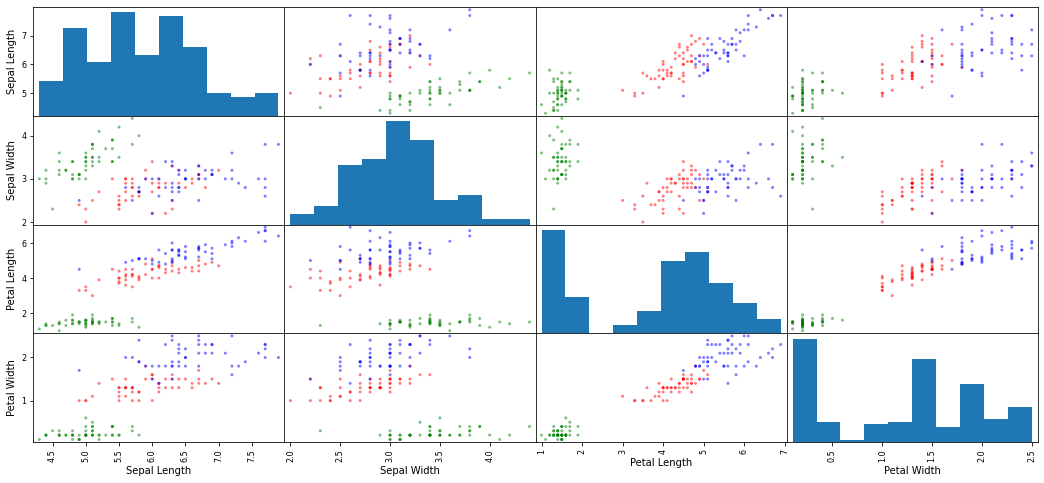

In [158]:
colMap={0:"green",1:"red",2:"blue"}
cols=list(map(lambda i:colMap.get(i),y))
pd.plotting.scatter_matrix(x, alpha=0.5, diagonal='hist', c=cols, figsize=(18, 8));

From my observation, the three classes are not equally well-separated. It looks like that Iris-setosa (the green one) is separated far away from the other two classes. And Iris-versicolor and Iris-virginica classes have some overlaps, which shows those two classes are not well-separated.

#### Q2: Cluster the the data using k-Means clustering. Form 3 clusters (n clusters=3), with the four features as the input data, and plot the resulting clusters as a 2D scatter plot. Use "Petal Length" for the x -axis of the plot and "Petal Width" for the y-axis, with each point colored according to its assigned cluster label.

In [93]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=0)
km.fit(x);

In [159]:
new_labels = km.labels_
new_labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

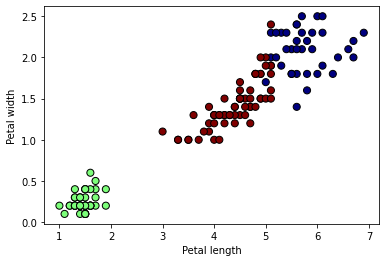

In [179]:
plt.scatter(x.iloc[:, 2], x.iloc[:, 3], c=new_labels, cmap='jet', edgecolor='k', s=50)
plt.xlabel('Petal length');
plt.ylabel('Petal width');

#### Q3: Show the cross-tabulation of the actual class values and the cluster labels. How many instances belong to an incorrect cluster? Do any of the cluster labels correspond perfectly to a class label? Do these observations agree with what you observed from the scatter plot matrix?

In [170]:
res = pd.crosstab(df['Name'], new_labels)
res.columns = ['Iris_virginica', 'Iris_setosa', 'Iris_versicolor']
res = res.rename(index={0: 'Iris_setosa', 1: 'Iris_versicolor', 2: 'Iris_virginica'})
res

,Iris_virginica,Iris_setosa,Iris_versicolor
Name,,,
Iris_setosa,0,50,0
Iris_versicolor,2,0,48
Iris_virginica,36,0,14


There are 16 (2+14) instances belong to an incorrect cluster.  
There is one cluster lable correspond perfectly to a class label: Iris-setosa.  
Compared with the scatter plot matrix I made earlier (plot with actual class), there is slightly different. In order to compare the difference, I made the following plots: (Reference: [PREDICTING IRIS FLOWER SPECIES WITH K-MEANS CLUSTERING IN PYTHON](https://medium.com/@belen.sanchez27/predicting-iris-flower-species-with-k-means-clustering-in-python-f6e46806aaee)

Text(0.5, 1.0, 'Predicted')

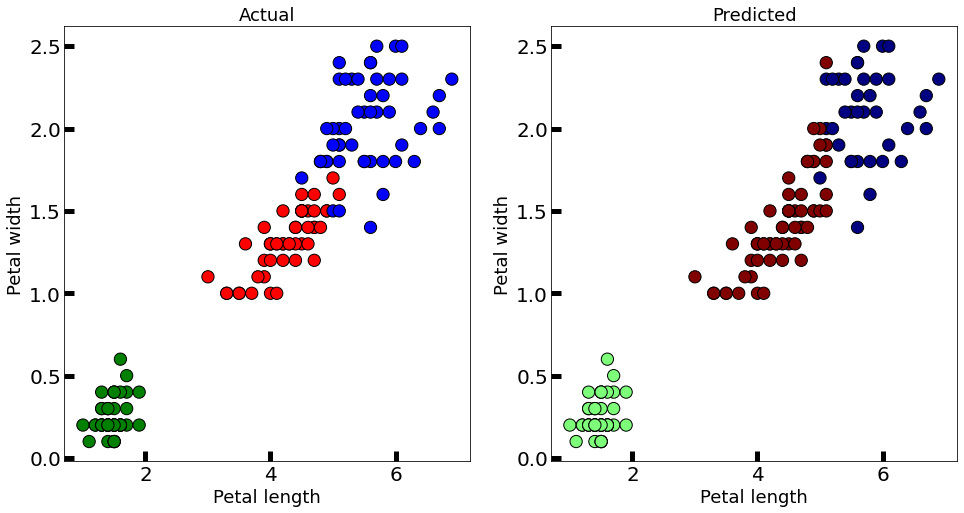

In [107]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(x.iloc[:, 2], x.iloc[:, 3], c=cols, cmap='gist_rainbow',
edgecolor='k', s=150);
axes[1].scatter(x.iloc[:, 2], x.iloc[:, 3], c=new_labels, cmap='jet',
edgecolor='k', s=150);
axes[0].set_xlabel('Petal length', fontsize=18)
axes[0].set_ylabel('Petal width', fontsize=18)
axes[1].set_xlabel('Petal length', fontsize=18)
axes[1].set_ylabel('Petal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)

As we can see from the above plots, some instances should belong to Iris-versicolor, but are classified as Iris-virginica, and vice versa.

#### Q4: To assess how similar the features are, calculate the mutual information between all pairs of features. That is, use each feature as the target variable once in the calculation. Create a DataFrame from the output and label the indices and columns of the DataFrame with the appropriate feature names.

In [142]:
from sklearn.feature_selection import f_regression, mutual_info_regression
Sepal_Length = df['Sepal Length']
Sepal_Width = df['Sepal Width']
Petal_Length = df['Petal Length']
Petal_Width = df['Petal Width']

In [143]:
#Use each feature as the target variable
mi_1 = mutual_info_regression(x, Sepal_Length)
mi_2 = mutual_info_regression(x, Sepal_Width)
mi_3 = mutual_info_regression(x, Petal_Length)
mi_4 = mutual_info_regression(x, Petal_Width)

In [171]:
#Creating Dataframe from Series
frame = { 'Sepal_Length': mi_1, 'Sepal_Width': mi_2, 'Petal_Length': mi_3,  'Petal_Width': mi_4}   
data = pd.DataFrame(frame) 
feature = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'] 
data['Feature'] = pd.Series(feature) 
#Change column order
cols = data.columns.tolist()
cols = cols[-1:] + cols[:-1]
data = data[cols]
data

,Feature,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,Sepal_Length,3.189699,0.286397,0.867638,0.608396
1,Sepal_Width,0.317198,2.665049,0.352037,0.400606
2,Petal_Length,0.884997,0.325745,3.162218,1.223159
3,Petal_Width,0.667369,0.418208,1.201297,2.713003


#### Q5: Create a dendrogram from the mutual information DataFrame. According to the dendrogram, which pair of features is most similar? Which feature is most unlike the others? You may use the following function to generate the dendrogram, which takes as input the fit cluster model; you can pass the feature names with the labels parameter.

In [155]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
#Agglomerative Clustering
new_df = data.drop(['Feature'], axis=1)
model = AgglomerativeClustering(n_clusters=4)
model = model.fit(new_df)

In [190]:
def plot_dendrogram(model, **kwargs):
    children = model.children_
    dist = np.arange(children.shape[0])+0.5
    n_obs = np.arange(2, children.shape[0]+2)
    linkage_matrix = np.column_stack([children, dist, n_obs])
    dendrogram(linkage_matrix.astype(float), **kwargs)

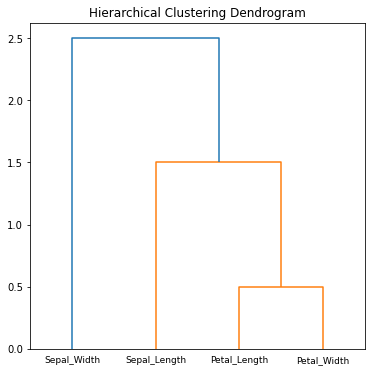

In [191]:
figure = plt.figure(figsize=(6, 6))
labels = data['Feature'].values
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, labels=labels, leaf_font_size=9)
plt.show()

According to the dendrogram, "Petal_Length" and "Petal_Width" are most similar. "Sepal_Width" and "Petal_Length" are most unlike the others. Because "Petal_Length" and "Petal_Width" belong to the same cluster with the minimum distance (0.5 in above plot), while "Sepal_Width" has the maximum distance to "Petal_Length" cluster (2.0 in above plot).  
Note: I changed the value of dist variable in plot_dendrogram() function as most of the original value in that model is smaller than 1, when it plus 1, it's hard to see the distance difference among those clusters.